In [1]:
import pandas as pd
import numpy as np
import astral
import datetime
import glob
import os
from astral import sun
from astral import LocationInfo
from astral import location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
from timezonefinder import TimezoneFinder
tf = TimezoneFinder()
import pytz
from datetime import tzinfo
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('data_clean/data.csv')

C:\Users\james\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.query('subject_race in ["white", "black", "hispanic"] and officer_race in ["white", "black", "hispanic"]')
df

,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
0,2008-10-10,NaN,ca,long beach,hispanic,hispanic,NaN,NaN
1,2008-10-10,NaN,ca,long beach,hispanic,white,NaN,NaN
2,2008-10-10,NaN,ca,long beach,hispanic,white,NaN,NaN
3,2008-10-10,NaN,ca,long beach,white,white,NaN,NaN
4,2008-10-10,NaN,ca,long beach,hispanic,white,NaN,NaN
...,...,...,...,...,...,...,...,...
8862266,NaN,NaN,pa,pittsburgh,white,white,True,False
8862267,NaN,NaN,pa,pittsburgh,black,white,True,False
8862268,NaN,NaN,pa,pittsburgh,white,white,True,False
8862269,NaN,NaN,pa,pittsburgh,white,white,True,False


In [4]:
df_veil = df.copy()
df_veil = df_veil.dropna(subset=['date', 'time', 'subject_race', 'officer_race'])
df_veil['date'] = pd.to_datetime(df_veil['date'], format = "%Y/%m/%d")
df_veil

,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,2010-01-06,16:14:43,fl,Duval County,white,black,False,NaN
364429,2010-01-08,19:39:31,fl,Duval County,white,white,False,NaN
364430,2010-01-11,11:56:34,fl,St. Lucie County,white,white,False,NaN
364433,2010-01-15,09:18:02,fl,Gadsden County,white,white,False,NaN
364434,2010-01-15,10:16:59,fl,Gadsden County,hispanic,white,True,NaN
...,...,...,...,...,...,...,...,...
8862260,2018-04-29,20:12:00,pa,pittsburgh,black,white,True,False
8862261,2018-04-29,20:18:00,pa,pittsburgh,white,white,True,True
8862262,2018-04-29,21:05:00,pa,pittsburgh,black,white,True,False
8862263,2018-04-29,21:28:00,pa,pittsburgh,black,white,True,False


In [5]:
df_veil['date'] = df_veil['date'].apply(lambda x: x.strftime('%m-%d'))
df_veil

,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,01-06,16:14:43,fl,Duval County,white,black,False,NaN
364429,01-08,19:39:31,fl,Duval County,white,white,False,NaN
364430,01-11,11:56:34,fl,St. Lucie County,white,white,False,NaN
364433,01-15,09:18:02,fl,Gadsden County,white,white,False,NaN
364434,01-15,10:16:59,fl,Gadsden County,hispanic,white,True,NaN
...,...,...,...,...,...,...,...,...
8862260,04-29,20:12:00,pa,pittsburgh,black,white,True,False
8862261,04-29,20:18:00,pa,pittsburgh,white,white,True,True
8862262,04-29,21:05:00,pa,pittsburgh,black,white,True,False
8862263,04-29,21:28:00,pa,pittsburgh,black,white,True,False


In [6]:
df_veil['date'] = df_veil['date'].apply(lambda x : '2016-'+x)
df_veil['date'] = pd.to_datetime(df_veil['date'], format="%Y/%m/%d")
df_veil

,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,2016-01-06,16:14:43,fl,Duval County,white,black,False,NaN
364429,2016-01-08,19:39:31,fl,Duval County,white,white,False,NaN
364430,2016-01-11,11:56:34,fl,St. Lucie County,white,white,False,NaN
364433,2016-01-15,09:18:02,fl,Gadsden County,white,white,False,NaN
364434,2016-01-15,10:16:59,fl,Gadsden County,hispanic,white,True,NaN
...,...,...,...,...,...,...,...,...
8862260,2016-04-29,20:12:00,pa,pittsburgh,black,white,True,False
8862261,2016-04-29,20:18:00,pa,pittsburgh,white,white,True,True
8862262,2016-04-29,21:05:00,pa,pittsburgh,black,white,True,False
8862263,2016-04-29,21:28:00,pa,pittsburgh,black,white,True,False


In [7]:
df_sunset = df_veil.groupby(['state', 'date']).count().reset_index()[['state', 'date']]
df_sunset

,state,date
0,fl,2016-01-01
1,fl,2016-01-02
2,fl,2016-01-03
3,fl,2016-01-04
4,fl,2016-01-05
...,...,...
1459,pa,2016-12-27
1460,pa,2016-12-28
1461,pa,2016-12-29
1462,pa,2016-12-30


In [8]:
states = df_sunset['state'][df_sunset['state'].duplicated(keep='first') == False].to_list()
locations = []
timezones = []
astr = []
for i in states  :
    locations.append(geolocator.geocode(i+' USA'))
for location in locations : 
    timezones.append(pytz.timezone(tf.timezone_at(lng=location.longitude, lat=location.latitude)))
    astr.append(astral.Observer(latitude = location.latitude, longitude = location.longitude))

In [9]:
sunset=[]
for row in df_sunset.iterrows() :
    index = states.index(row[1]['state'])
    sunset.append(sun.sunset(astr[index], date=row[1]['date'], tzinfo = timezones[index]))

In [10]:
df_sunset['sunset']=[sunset[i].time() for i in range(len(sunset))]
df_sunset['date']=pd.to_datetime(df_sunset['date'], format = "%Y/%m/%d")

In [11]:
df_sunset.to_csv(r'data_clean/data_sunset.csv', index=False)

In [12]:
df_sunset = pd.read_csv('data_clean/data_sunset.csv')
df_sunset

,state,date,sunset
0,fl,2016-01-01,17:41:45.493173
1,fl,2016-01-02,17:42:26.700927
2,fl,2016-01-03,17:43:08.686556
3,fl,2016-01-04,17:43:51.408405
4,fl,2016-01-05,17:44:34.824605
...,...,...,...
1459,pa,2016-12-27,16:49:33.083010
1460,pa,2016-12-28,16:50:16.518718
1461,pa,2016-12-29,16:51:01.752635
1462,pa,2016-12-30,16:51:48.737243


In [13]:
sunset_min = df_sunset['sunset'].min()
sunset_max = df_sunset['sunset'].max()
print(sunset_min, sunset_max)
df_veil['time'] = [datetime.datetime.strptime(df_veil['time'].iloc[i], '%H:%M:%S') for i in range(len(df_veil))]
#df_veil = df_veil.loc[(df_veil['time']>(datetime.£datetime.strptime(sunset_min[0:8], '%H:%M:%S')+datetime.datetime.strptime('02:00:00', '%H:%M:%S'))) & (df_veil['time']<(datetime.datetime.strptime(sunset_max[0:8], '%H:%M:%S')+datetime.datetime.strptime('02:00:00', '%H:%M:%S')))]
df_veil

16:42:18.243685 21:13:45.831757


,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,2016-01-06,1900-01-01 16:14:43,fl,Duval County,white,black,False,NaN
364429,2016-01-08,1900-01-01 19:39:31,fl,Duval County,white,white,False,NaN
364430,2016-01-11,1900-01-01 11:56:34,fl,St. Lucie County,white,white,False,NaN
364433,2016-01-15,1900-01-01 09:18:02,fl,Gadsden County,white,white,False,NaN
364434,2016-01-15,1900-01-01 10:16:59,fl,Gadsden County,hispanic,white,True,NaN
...,...,...,...,...,...,...,...,...
8862260,2016-04-29,1900-01-01 20:12:00,pa,pittsburgh,black,white,True,False
8862261,2016-04-29,1900-01-01 20:18:00,pa,pittsburgh,white,white,True,True
8862262,2016-04-29,1900-01-01 21:05:00,pa,pittsburgh,black,white,True,False
8862263,2016-04-29,1900-01-01 21:28:00,pa,pittsburgh,black,white,True,False


In [14]:
df_veil = df_veil.loc[(df_veil['time']>datetime.datetime.strptime("14:42:00", '%H:%M:%S')) & (df_veil['time']<(datetime.datetime.strptime("23:34:00", '%H:%M:%S')))]
df_veil

,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,2016-01-06,1900-01-01 16:14:43,fl,Duval County,white,black,False,NaN
364429,2016-01-08,1900-01-01 19:39:31,fl,Duval County,white,white,False,NaN
364448,2016-01-17,1900-01-01 23:03:58,fl,Madison County,white,white,False,NaN
364464,2016-01-18,1900-01-01 14:44:57,fl,Jefferson County,black,black,False,NaN
364465,2016-01-18,1900-01-01 15:23:49,fl,Leon County,black,black,False,NaN
...,...,...,...,...,...,...,...,...
8862260,2016-04-29,1900-01-01 20:12:00,pa,pittsburgh,black,white,True,False
8862261,2016-04-29,1900-01-01 20:18:00,pa,pittsburgh,white,white,True,True
8862262,2016-04-29,1900-01-01 21:05:00,pa,pittsburgh,black,white,True,False
8862263,2016-04-29,1900-01-01 21:28:00,pa,pittsburgh,black,white,True,False


In [15]:
#df_sunset['date']=pd.to_datetime(df_sunset['date'], format = "%Y/%m/%d")
#df_veil['date']=pd.to_datetime(df_veil['date'], format = "%Y/%m/%d")
df_veil['time']= [df_veil['time'].iloc[i].to_pydatetime() for i in range(len(df_veil))]
df_veil

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,2016-01-06,1900-01-01 16:14:43,fl,Duval County,white,black,False,NaN
364429,2016-01-08,1900-01-01 19:39:31,fl,Duval County,white,white,False,NaN
364448,2016-01-17,1900-01-01 23:03:58,fl,Madison County,white,white,False,NaN
364464,2016-01-18,1900-01-01 14:44:57,fl,Jefferson County,black,black,False,NaN
364465,2016-01-18,1900-01-01 15:23:49,fl,Leon County,black,black,False,NaN
...,...,...,...,...,...,...,...,...
8862260,2016-04-29,1900-01-01 20:12:00,pa,pittsburgh,black,white,True,False
8862261,2016-04-29,1900-01-01 20:18:00,pa,pittsburgh,white,white,True,True
8862262,2016-04-29,1900-01-01 21:05:00,pa,pittsburgh,black,white,True,False
8862263,2016-04-29,1900-01-01 21:28:00,pa,pittsburgh,black,white,True,False


In [16]:
df_veil_ = df_veil.loc[df_veil['state']=='pa']
df_veil_['date'] = [df_veil_.iloc[i]['date'].strftime("%Y-%m-%d") for i in range(len(df_veil_))]
#df_veil_['date'] = pd.to_datetime(df_veil_['date'], format="%Y/%m/%d")
#df_veil_['time'] = [str(df_veil_['time'].iloc[i].hour)+':'+str(df_veil_['time'].iloc[i].minute)+''+str(df_veil_['time'].iloc[i].second) for i in range(len(df_veil_))]
df_veil_

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
8638506,2016-01-02,1900-01-01 14:55:00,pa,pittsburgh,black,white,True,True
8638507,2016-01-02,1900-01-01 21:15:00,pa,pittsburgh,white,white,True,False
8638508,2016-01-03,1900-01-01 21:38:00,pa,pittsburgh,white,white,True,False
8638515,2016-01-05,1900-01-01 17:30:00,pa,pittsburgh,white,white,True,False
8638516,2016-01-05,1900-01-01 20:10:00,pa,pittsburgh,black,white,True,False
...,...,...,...,...,...,...,...,...
8862260,2016-04-29,1900-01-01 20:12:00,pa,pittsburgh,black,white,True,False
8862261,2016-04-29,1900-01-01 20:18:00,pa,pittsburgh,white,white,True,True
8862262,2016-04-29,1900-01-01 21:05:00,pa,pittsburgh,black,white,True,False
8862263,2016-04-29,1900-01-01 21:28:00,pa,pittsburgh,black,white,True,False


In [17]:
df_veil['date'] = [df_veil.iloc[i]['date'].strftime("%Y-%m-%d") for i in range(len(df_veil))]
df_veil

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,time,state,county_name,subject_race,officer_race,search_conducted,contraband_found
364428,2016-01-06,1900-01-01 16:14:43,fl,Duval County,white,black,False,NaN
364429,2016-01-08,1900-01-01 19:39:31,fl,Duval County,white,white,False,NaN
364448,2016-01-17,1900-01-01 23:03:58,fl,Madison County,white,white,False,NaN
364464,2016-01-18,1900-01-01 14:44:57,fl,Jefferson County,black,black,False,NaN
364465,2016-01-18,1900-01-01 15:23:49,fl,Leon County,black,black,False,NaN
...,...,...,...,...,...,...,...,...
8862260,2016-04-29,1900-01-01 20:12:00,pa,pittsburgh,black,white,True,False
8862261,2016-04-29,1900-01-01 20:18:00,pa,pittsburgh,white,white,True,True
8862262,2016-04-29,1900-01-01 21:05:00,pa,pittsburgh,black,white,True,False
8862263,2016-04-29,1900-01-01 21:28:00,pa,pittsburgh,black,white,True,False


In [26]:
df_veil_sunset = pd.DataFrame(columns = ['subject_race', 'officer_race', 'time_sunset'])
for row in df_veil.iterrows() :
    sunset = df_sunset.loc[(df_sunset['state'] == row[1]['state']) & (df_sunset['date'] == row[1]['date']), 'sunset'].values[0][0:8]
    time_sunset = (row[1]['time'] - datetime.datetime.strptime(sunset, '%H:%M:%S')).total_seconds()
    df_veil_sunset = df_veil_sunset.append({'subject_race' : row[1]['subject_race'], 'officer_race' : row[1]['officer_race'], 'time_sunset' : time_sunset}, ignore_index = True)

In [27]:
df_veil_sunset.to_csv(r'data_clean/df_veil_sunset.csv', index=False)

In [243]:
df_sunset.loc[(df_sunset['state'] == 'fl') & (df_sunset['date'] == "2016-01-08"), 'sunset']

7    17:46:48.819205
Name: sunset, dtype: object

In [210]:
df_veil_sunset = pd.read_csv('data_clean/df_veil_sunset.csv')
df_veil_sunset

,subject_race,officer_race,time_sunset
0,white,black,-5435.0
1,white,white,6763.0
2,white,white,18604.0
3,black,black,-11386.0
4,black,black,-9054.0
...,...,...,...
1802607,black,white,373.0
1802608,white,white,733.0
1802609,black,white,3553.0
1802610,black,white,4933.0


In [211]:
df_veil_sunset = df_veil_sunset.loc[(df_veil_sunset['time_sunset']>-5400) & (df_veil_sunset['time_sunset']<7200)]
df_veil_sunset = df_veil_sunset.loc[(df_veil_sunset['time_sunset']<0) | (df_veil_sunset['time_sunset']>1800)]
df_veil_sunset['time_sunset'] = df_veil_sunset['time_sunset'].apply(lambda x : int(math.ceil(x / 600.0)) * 10)
df_veil_sunset = pd.get_dummies(df_veil_sunset, columns=['subject_race'])
df_veil_sunset

,officer_race,time_sunset,subject_race_black,subject_race_hispanic,subject_race_white
1,white,120,0,0,1
5,black,40,1,0,0
10,white,-80,0,1,0
11,white,40,0,0,1
12,white,100,0,0,1
...,...,...,...,...,...
1802605,white,-10,1,0,0
1802606,white,0,1,0,0
1802609,white,60,1,0,0
1802610,white,90,1,0,0


In [212]:
df_veil_sunset=df_veil_sunset.groupby(['officer_race', 'time_sunset']).sum()
df_veil_sunset

subject_race_black  subject_race_hispanic  \
officer_race time_sunset                                              
black        -80                      1577.0                 1865.0   
             -70                      1590.0                 1873.0   
             -60                      1493.0                 1826.0   
             -50                      1453.0                 1725.0   
             -40                      1444.0                 1719.0   
             -30                      1389.0                 1643.0   
             -20                      1267.0                 1511.0   
             -10                      1306.0                 1464.0   
              0                       1252.0                 1401.0   
              40                       748.0                  826.0   
              50                       765.0                  787.0   
              60                       749.0                  738.0   
              70                       687.0                  721.0   
              80                       639.0                  679.0   
              90                       637.0                  617.0   
              100                      591.0                  591.0   
              110                      681.0                  658.0   
              120                      630.0                  597.0   
hispanic     -80                      1033.0                 2552.0   
             -70                      1215.0                 2513.0   
             -60                      1129.0                 2378.0   
             -50                      1059.0                 2351.0   
             -40                      1014.0                 2263.0   
             -30                       958.0                 2219.0   
             -20                       937.0                 2128.0   
             -10                      1009.0                 2070.0   
              0                        870.0                 1901.0   
              40                       572.0                 1236.0   
              50                       651.0                 1191.0   
              60                       541.0                 1088.0   
              70                       485.0                 1058.0   
              80                       479.0                 1037.0   
              90                       488.0                  942.0   
              100                      483.0                  925.0   
              110                      518.0                  931.0   
              120                      442.0                  865.0   
white        -80                      6580.0                 5175.0   
             -70                      6466.0                 5224.0   
             -60                      6420.0                 4969.0   
             -50                      6336.0                 4685.0   
             -40                      6038.0                 4690.0   
             -30                      5696.0                 4545.0   
             -20                      5637.0                 4457.0   
             -10                      5805.0                 4306.0   
              0                       5251.0                 3936.0   
              40                      4331.0                 2980.0   
              50                      4317.0                 3044.0   
              60                      4098.0                 2802.0   
              70                      3913.0                 2822.0   
              80                      3697.0                 2563.0   
              90                      3741.0                 2501.0   
              100                     3687.0                 2704.0   
              110                     3871.0                 2829.0   
              120                     3696.0                 2510.0   

                          subject_race_white  
of

In [213]:
sum_row_list = [] #for the size of the rounds
sum_row = 0
for row in df_veil_sunset.iterrows() :
    sum_row = row[1]['subject_race_black']+row[1]['subject_race_hispanic']+row[1]['subject_race_white']
    row[1]['subject_race_black']/= sum_row
    row[1]['subject_race_hispanic']/= sum_row
    row[1]['subject_race_white']/= sum_row
    sum_row_list.append(sum_row)
df_veil_sunset['sum_row']=sum_row_list
df_veil_sunset

subject_race_black  subject_race_hispanic  \
officer_race time_sunset                                              
black        -80                    0.221613               0.262085   
             -70                    0.226174               0.266430   
             -60                    0.218787               0.267585   
             -50                    0.219122               0.260142   
             -40                    0.228228               0.271693   
             -30                    0.229511               0.271481   
             -20                    0.224606               0.267860   
             -10                    0.240826               0.269961   
              0                     0.244722               0.273847   
              40                    0.241368               0.266538   
              50                    0.251810               0.259052   
              60                    0.261614               0.257772   
              70                    0.243963               0.256037   
              80                    0.247004               0.262466   
              90                    0.253280               0.245328   
              100                   0.250742               0.250742   
              110                   0.276380               0.267045   
              120                   0.262500               0.248750   
hispanic     -80                    0.179840               0.444290   
             -70                    0.215617               0.445963   
             -60                    0.207422               0.436891   
             -50                    0.199210               0.442250   
             -40                    0.198551               0.443117   
             -30                    0.196674               0.455553   
             -20                    0.199744               0.453635   
             -10                    0.217083               0.445353   
              0                     0.206406               0.451008   
              40                    0.198818               0.429614   
              50                    0.227702               0.416579   
              60                    0.212992               0.428346   
              70                    0.197315               0.430431   
              80                    0.202024               0.437368   
              90                    0.223443               0.431319   
              100                   0.224442               0.429833   
              110                   0.238161               0.428046   
              120                   0.220669               0.431852   
white        -80                    0.218510               0.171853   
             -70                    0.216718               0.175090   
             -60                    0.222230               0.172003   
             -50                    0.227447               0.168180   
             -40                    0.224344               0.174259   
             -30                    0.221221               0.176519   
             -20                    0.227106               0.179566   
             -10                    0.238968               0.177260   
              0                     0.229692               0.172171   
              40                    0.239414               0.164732   
              50                    0.241835               0.170523   
              60                    0.240648               0.164543   
              70                    0.235908               0.170133   
              80                    0.235523               0.163280   
              90                    0.241246               0.161282   
              100                   0.238533               0.174937   
              110                   0.249356               0.182234   
              120                   0.249544               0.169469   

                          subject_race_white  sum

In [214]:
df_veil_sunset = df_veil_sunset.reset_index()
df_veil_sunset

,officer_race,time_sunset,subject_race_black,subject_race_hispanic,subject_race_white,sum_row
0,black,-80,0.221613,0.262085,0.516301,7116.0
1,black,-70,0.226174,0.266430,0.507397,7030.0
2,black,-60,0.218787,0.267585,0.513628,6824.0
3,black,-50,0.219122,0.260142,0.520736,6631.0
4,black,-40,0.228228,0.271693,0.500079,6327.0
5,black,-30,0.229511,0.271481,0.499009,6052.0
6,black,-20,0.224606,0.267860,0.507534,5641.0
7,black,-10,0.240826,0.269961,0.489213,5423.0
8,black,0,0.244722,0.273847,0.481431,5116.0
9,black,40,0.241368,0.266538,0.492094,3099.0


In [249]:
def draw(ax, df, race_officer, race_subject, sum_row_list, size) : 
    df_veil_draw = df.loc[df['officer_race']==race_officer]
    list_sizes = df_veil_draw['sum_row'].copy()
    list_sizes[:] = [x/size for x in list_sizes]
    ax.scatter(df_veil_draw['time_sunset'], df_veil_draw[race_subject], s=list_sizes)
    mean_before = df_veil_draw.loc[df_veil_draw['time_sunset']<=0].mean()[race_subject]
    mean_after = df_veil_draw.loc[df_veil_draw['time_sunset']>=30].mean()[race_subject]
    std_before = df_veil_draw.loc[df_veil_draw['time_sunset']<=0].std()[race_subject]
    std_after = df_veil_draw.loc[df_veil_draw['time_sunset']>=30].std()[race_subject]
    ax.hlines(mean_before, xmin=-80, xmax=0, colors='k', linestyles='solid')
    ax.hlines(mean_after, xmin=30, xmax=120, colors='k', linestyles='solid')
    ax.hlines(mean_before+std_before, xmin=-80, xmax=0, colors='k', linestyles='--')
    ax.hlines(mean_after+std_after, xmin=30, xmax=120, colors='k', linestyles='--')
    ax.hlines(mean_before-std_before, xmin=-80, xmax=0, colors='k', linestyles='--')
    ax.hlines(mean_after-std_after, xmin=30, xmax=120, colors='k', linestyles='--')
    ax.axvline(0)
    ax.axvline(30)
    ax.set_title(f'Officer : {race_officer}, Driver : {race_subject[13:]}')
    ax.set_xticks([-90, -60, -30, 0, 30, 60, 90, 120])
    return []

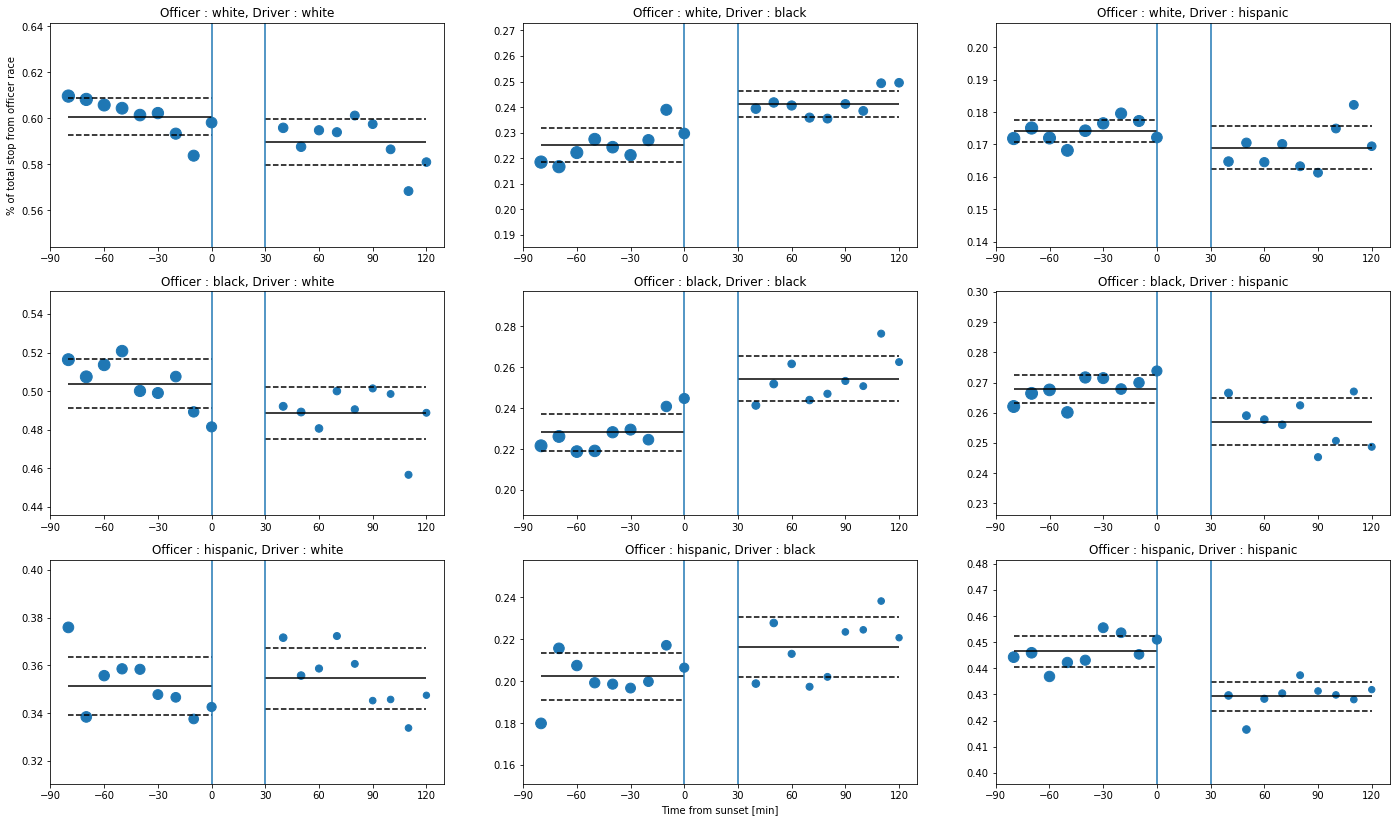

In [250]:
fig = plt.figure(figsize=(24, 14))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)

ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)

ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)


draw(ax1 , df_veil_sunset, 'white', 'subject_race_white', sum_row_list, 200)
draw(ax2 , df_veil_sunset, 'white', 'subject_race_black', sum_row_list, 200)
draw(ax3 , df_veil_sunset, 'white', 'subject_race_hispanic', sum_row_list, 200)

draw(ax4 , df_veil_sunset, 'black', 'subject_race_white', sum_row_list, 50)
draw(ax5 , df_veil_sunset, 'black', 'subject_race_black', sum_row_list, 50)
draw(ax6 , df_veil_sunset, 'black', 'subject_race_hispanic', sum_row_list, 50)

draw(ax7 , df_veil_sunset, 'hispanic', 'subject_race_white', sum_row_list, 50)
draw(ax8 , df_veil_sunset, 'hispanic', 'subject_race_black', sum_row_list, 50)
draw(ax9 , df_veil_sunset, 'hispanic', 'subject_race_hispanic', sum_row_list, 50)

ax8.set_xlabel('Time from sunset [min]')
ax1.set_ylabel('% of total stop from officer race')

plt.show()

In [268]:
def draw(ax, df, race_subject, sum_row_list, size) : 
    list_sizes = df['sum_row'].copy()
    list_sizes[:] = [x/size for x in list_sizes]
    ax.scatter(df['time_sunset'], df[race_subject], s=list_sizes)
    mean_before = df.loc[df['time_sunset']<=0].mean()[race_subject]
    mean_after = df.loc[df['time_sunset']>=30].mean()[race_subject]
    std_before = df.loc[df['time_sunset']<=0].std()[race_subject]
    std_after = df.loc[df['time_sunset']>=30].std()[race_subject]
    ax.hlines(mean_before, xmin=-80, xmax=0, colors='k', linestyles='solid')
    ax.hlines(mean_after, xmin=30, xmax=120, colors='k', linestyles='solid')
    ax.hlines(mean_before+std_before, xmin=-80, xmax=0, colors='k', linestyles='--')
    ax.hlines(mean_after+std_after, xmin=30, xmax=120, colors='k', linestyles='--')
    ax.hlines(mean_before-std_before, xmin=-80, xmax=0, colors='k', linestyles='--')
    ax.hlines(mean_after-std_after, xmin=30, xmax=120, colors='k', linestyles='--')
    ax.axvline(0)
    ax.axvline(30)
    ax.set_title(f'Driver : {race_subject[13:]}')
    ax.set_xticks([-90, -60, -30, 0, 30, 60, 90, 120])
    return []

[]

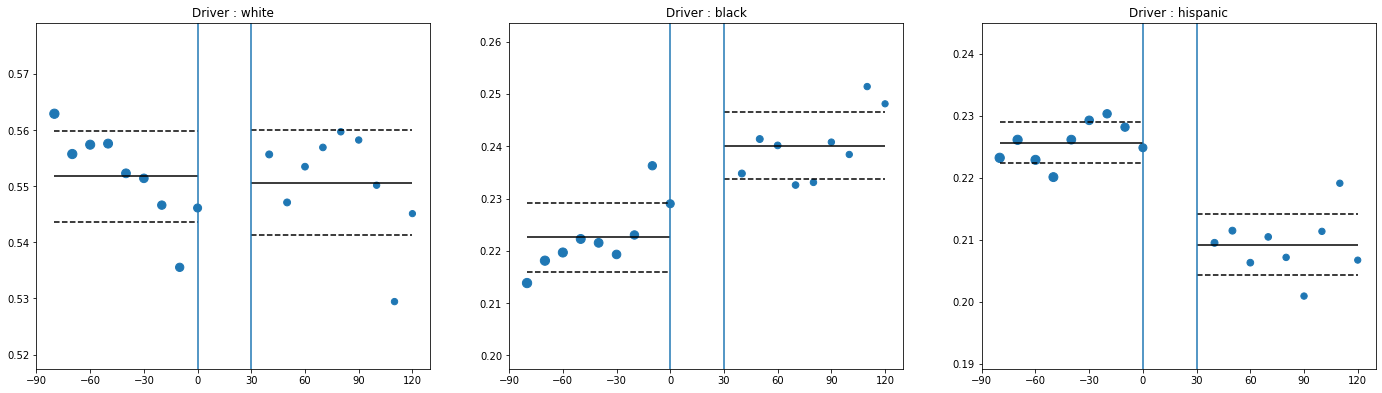

In [269]:
df_veil_sunset = pd.read_csv('data_clean/df_veil_sunset.csv')
df_no_officer_race = df_veil_sunset.drop(columns='officer_race')
df_no_officer_race = df_no_officer_race.loc[(df_no_officer_race['time_sunset']>-5400) & (df_no_officer_race['time_sunset']<7200)]
df_no_officer_race = df_no_officer_race.loc[(df_no_officer_race['time_sunset']<0) | (df_no_officer_race['time_sunset']>1800)]
df_no_officer_race['time_sunset'] = df_no_officer_race['time_sunset'].apply(lambda x : int(math.ceil(x / 600.0)) * 10)
df_no_officer_race = pd.get_dummies(df_no_officer_race, columns=['subject_race'])
df_no_officer_race = df_no_officer_race.groupby(['time_sunset']).sum()

sum_row_list = [] #for the size of the rounds
sum_row = 0
for row in df_no_officer_race.iterrows() :
    sum_row = row[1]['subject_race_black']+row[1]['subject_race_hispanic']+row[1]['subject_race_white']
    row[1]['subject_race_black']/= sum_row
    row[1]['subject_race_hispanic']/= sum_row
    row[1]['subject_race_white']/= sum_row
    sum_row_list.append(sum_row)
df_no_officer_race['sum_row']=sum_row_list
df_no_officer_race

df_no_officer_race = df_no_officer_race.reset_index()

fig = plt.figure(figsize=(24, 14))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

draw(ax1 , df_no_officer_race, 'subject_race_white', sum_row_list, 500)
draw(ax2 , df_no_officer_race, 'subject_race_black', sum_row_list, 500)
draw(ax3 , df_no_officer_race, 'subject_race_hispanic', sum_row_list, 500)

In [35]:
FOLDER = 'raw/'
FOLDER_JAMES = 'data/texas'

csvfiles = glob.glob(os.path.join(FOLDER_JAMES, '*.csv'))

data = pd.DataFrame(columns=['date', 'time', 'county_name', 'subject_race',])

chunksize = 10 ** 6
for csvfile in csvfiles:
    for chunk in pd.read_csv(csvfile, usecols=lambda x: x in ['date', 'time', 'county_name', 'subject_race'] \
                     , chunksize=chunksize, low_memory=False, error_bad_lines = False):
        chunk['state'] = csvfile[18:20]
        if 'county_name' not in chunk.columns:
            end=0
            for i in range(len(csvfile)) :
                if csvfile[i].isdigit() :
                    end = i
                    break
            county_name = csvfile[14:end-1]
            county_name = county_name.replace('_', ' ')
            chunk['county_name']=county_name
        data = pd.concat([data, chunk], axis=0 , ignore_index=True, sort=False)

In [36]:
df = data.query('subject_race in ["white", "black", "hispanic"]')

In [37]:
df = df.dropna(subset=['date', 'time', 'subject_race'])
df['date'] = pd.to_datetime(df['date'], format = "%Y/%m/%d")
df

,date,time,county_name,subject_race,state
0,2016-03-26,19:46:06,arlington,white,ng
1,2016-03-13,18:00:41,arlington,black,ng
2,2016-02-19,17:21:53,arlington,white,ng
3,2016-02-12,00:58:55,arlington,white,ng
4,2016-02-09,14:32:43,arlington,white,ng
...,...,...,...,...,...
30204752,2017-12-31,23:56:00,Nueces County,white,ew
30204753,2017-12-31,23:57:00,Nueces County,hispanic,ew
30204754,2017-12-31,23:57:00,Val Verde County,hispanic,ew
30204755,2017-12-31,23:58:00,Van Zandt County,white,ew


In [38]:
df['date'] = df['date'].apply(lambda x: x.strftime('%m-%d'))
df['date'] = df['date'].apply(lambda x : '2016-'+x)
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")
df

,date,time,county_name,subject_race,state
0,2016-03-26,19:46:06,arlington,white,ng
1,2016-03-13,18:00:41,arlington,black,ng
2,2016-02-19,17:21:53,arlington,white,ng
3,2016-02-12,00:58:55,arlington,white,ng
4,2016-02-09,14:32:43,arlington,white,ng
...,...,...,...,...,...
30204752,2016-12-31,23:56:00,Nueces County,white,ew
30204753,2016-12-31,23:57:00,Nueces County,hispanic,ew
30204754,2016-12-31,23:57:00,Val Verde County,hispanic,ew
30204755,2016-12-31,23:58:00,Van Zandt County,white,ew


In [39]:
df_sunset_tx = df.groupby(['date']).count().reset_index()[['date']]

In [40]:
location = geolocator.geocode('Texas USA')

timezone = pytz.timezone(tf.timezone_at(lng=location.longitude, lat=location.latitude))
astr = astral.Observer(latitude = location.latitude, longitude = location.longitude)

In [41]:
sunset=[]
for row in df_sunset_tx.iterrows() :
    sunset.append(sun.sunset(astr, date=row[1]['date'], tzinfo = timezone))

In [42]:
df_sunset_tx['sunset']=[sunset[i].time() for i in range(len(sunset))]
df_sunset_tx['date']=pd.to_datetime(df_sunset_tx['date'], format = "%Y/%m/%d")

In [44]:
sunset_min = df_sunset_tx['sunset'].min()
sunset_max = df_sunset_tx['sunset'].max()
print(sunset_min, sunset_max)
df['time'] = [datetime.datetime.strptime(df['time'].iloc[i], '%H:%M:%S') for i in range(len(df))]
#df_veil = df_veil.loc[(df_veil['time']>(datetime.£datetime.strptime(sunset_min[0:8], '%H:%M:%S')+datetime.datetime.strptime('02:00:00', '%H:%M:%S'))) & (df_veil['time']<(datetime.datetime.strptime(sunset_max[0:8], '%H:%M:%S')+datetime.datetime.strptime('02:00:00', '%H:%M:%S')))]
#for i in range(len(df)) :
#    #print(df['time'].iloc[i])
#    a = datetime.datetime.strptime(df['time'].iloc[i], '%H:%M:%S')
#    print(i)
df 

17:33:32.293051 20:47:27.544016


,date,time,county_name,subject_race,state
0,2016-03-26,1900-01-01 19:46:06,arlington,white,ng
1,2016-03-13,1900-01-01 18:00:41,arlington,black,ng
2,2016-02-19,1900-01-01 17:21:53,arlington,white,ng
3,2016-02-12,1900-01-01 00:58:55,arlington,white,ng
4,2016-02-09,1900-01-01 14:32:43,arlington,white,ng
...,...,...,...,...,...
30204752,2016-12-31,1900-01-01 23:56:00,Nueces County,white,ew
30204753,2016-12-31,1900-01-01 23:57:00,Nueces County,hispanic,ew
30204754,2016-12-31,1900-01-01 23:57:00,Val Verde County,hispanic,ew
30204755,2016-12-31,1900-01-01 23:58:00,Van Zandt County,white,ew


In [46]:
df = df.loc[(df['time']>datetime.datetime.strptime("15:33:00", '%H:%M:%S')) & (df['time']<(datetime.datetime.strptime("23:17:00", '%H:%M:%S')))]

In [49]:
df_veil_sunset_tx = pd.DataFrame(columns = ['subject_race', 'time_sunset'])
for row in df.iterrows() :
    sunset = df_sunset_tx.loc[(df_sunset_tx['date'] == row[1]['date']), 'sunset'].values[0][0:8]
    time_sunset = (row[1]['time'] - datetime.datetime.strptime(sunset, '%H:%M:%S')).total_seconds()
    df_veil_sunset_tx = df_veil_sunset_tx.append({'subject_race' : row[1]['subject_race'], 'time_sunset' : time_sunset}, ignore_index = True)
    break
df_veil_sunset_tx

TypeError: 'datetime.time' object is not subscriptable